In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "/content/sample_data/Assignment.xlsx"

# Read each sheet into separate DataFrames
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Display initial information
print("User Details:")
print(user_details.head())
print("\nCooking Sessions:")
print(cooking_sessions.head())
print("\nOrder Details:")
print(order_details.head())



User Details:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  

Cooking Sessions:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Sala

In [31]:
# Check for missing values
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

# Handle missing data (example: drop rows with missing UserID)
user_details = user_details.dropna(subset=["User ID"])
cooking_sessions = cooking_sessions.dropna()
order_details = order_details.dropna()

# Check for duplicates
print(user_details.duplicated().sum())
print(cooking_sessions.duplicated().sum())
print(order_details.duplicated().sum())

# Drop duplicates if found
user_details = user_details.drop_duplicates()
cooking_sessions = cooking_sessions.drop_duplicates()
order_details = order_details.drop_duplicates()


User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64
0
0
0


In [32]:
# Standardize column names (e.g., make lowercase and remove spaces)
user_details.columns = user_details.columns.str.lower().str.replace(' ', '_')
cooking_sessions.columns = cooking_sessions.columns.str.lower().str.replace(' ', '_')
order_details.columns = order_details.columns.str.lower().str.replace(' ', '_')

# Convert date columns to datetime
cooking_sessions['session_start'] = pd.to_datetime(cooking_sessions['session_start'])
order_details['order_date'] = pd.to_datetime(order_details['order_date'])


In [33]:
# Merge CookingSessions with UserDetails
user_cooking = pd.merge(cooking_sessions, user_details, on='user_id', how='inner')

# Merge the result with OrderDetails
final_data = pd.merge(user_cooking, order_details, on='user_id', how='inner')

# Save the cleaned and merged dataset for future analysis
final_data.to_csv('cleaned_data.csv', index=False)


In [34]:
# Count sessions per user
sessions_per_user = cooking_sessions.groupby('user_id').size()

# Count orders per user
orders_per_user = order_details.groupby('user_id').size()

# Merge counts
activity_data = pd.DataFrame({
    'sessions': sessions_per_user,
    'orders': orders_per_user
}).reset_index()

# Calculate correlation between sessions and orders, excluding the 'user_id' column
correlation = activity_data[['sessions', 'orders']].corr()  # Select only numeric columns

print(correlation)


          sessions    orders
sessions  1.000000  0.696311
orders    0.696311  1.000000


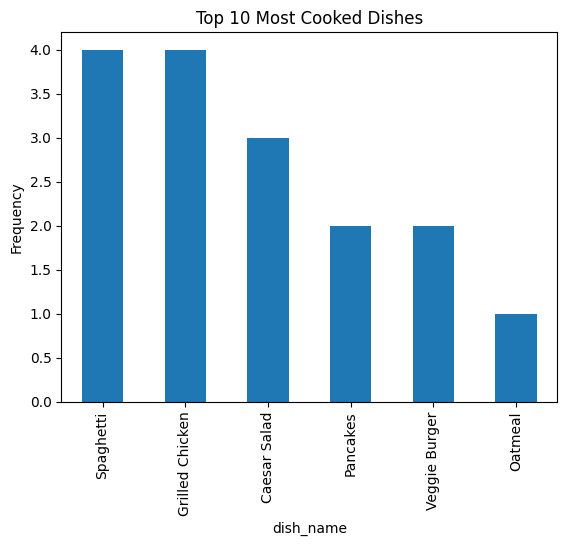

In [35]:
# Most cooked dishes
popular_dishes = cooking_sessions['dish_name'].value_counts()

# Plot top 10 dishes
import matplotlib.pyplot as plt

popular_dishes.head(10).plot(kind='bar', title='Top 10 Most Cooked Dishes')
plt.ylabel('Frequency')
plt.show()


<ipython-input-36-a794d9f1948d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cooking = user_cooking.groupby('age_group')['session_id'].count()


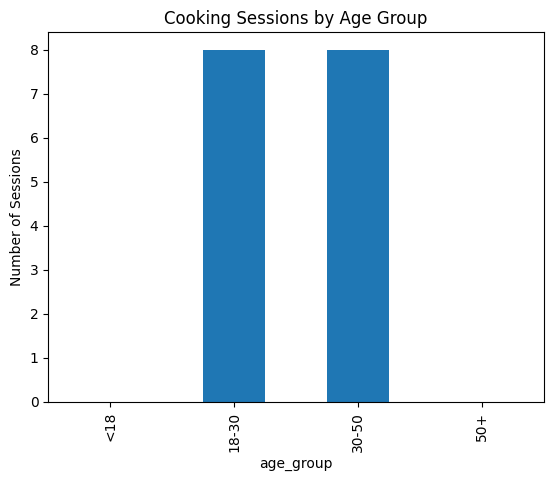

In [36]:
# Age group vs number of cooking sessions
user_cooking['age_group'] = pd.cut(user_cooking['age'], bins=[0, 18, 30, 50, 100], labels=['<18', '18-30', '30-50', '50+'])
age_cooking = user_cooking.groupby('age_group')['session_id'].count()

# Plot results
age_cooking.plot(kind='bar', title='Cooking Sessions by Age Group')
plt.ylabel('Number of Sessions')
plt.show()


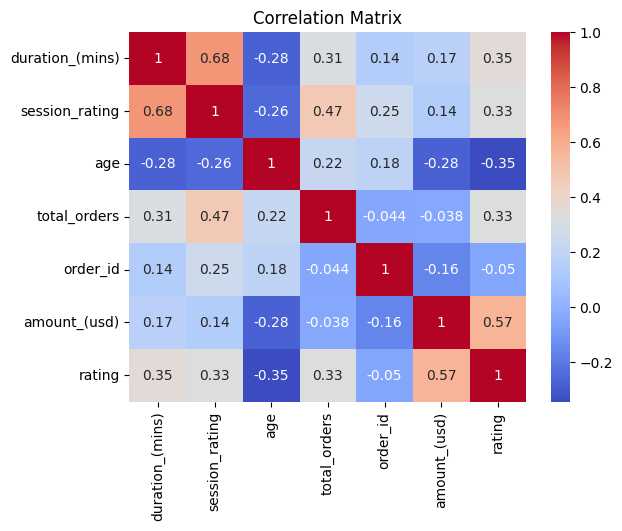

In [37]:
# Select only numeric columns for correlation calculation
numeric_data = final_data.select_dtypes(include=['number'])

# Correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

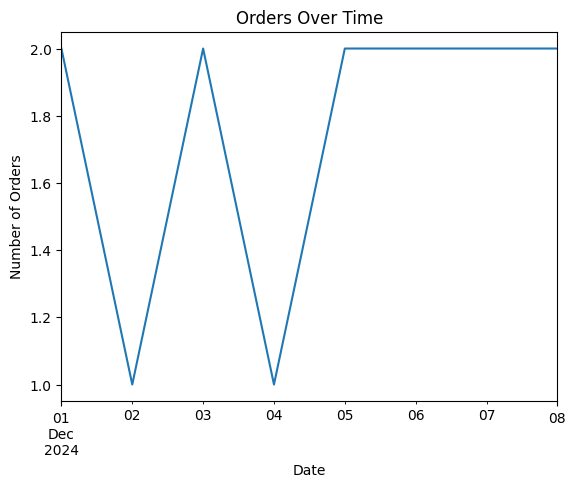

In [38]:
# Trend of orders over time
order_trends = order_details.groupby('order_date')['order_id'].count()

order_trends.plot(kind='line', title='Orders Over Time')
plt.ylabel('Number of Orders')
plt.xlabel('Date')
plt.show()
